In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel(r"C:\Users\Durka Ravikumar\Downloads\panic.xlsx")

In [4]:
data.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


In [5]:
data.shape

(50000, 17)

In [6]:
data.columns

Index(['Participant ID', 'Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors', 'Panic Disorder Diagnosis'],
      dtype='object')

In [7]:
data.describe()

,Participant ID,Age,Panic Disorder Diagnosis
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,41.473520,0.042440
std,14433.901067,13.808309,0.201593
min,1.000000,18.000000,0.000000
25%,12500.750000,30.000000,0.000000
50%,25000.500000,42.000000,0.000000
75%,37500.250000,53.000000,0.000000
max,50000.000000,65.000000,1.000000


In [8]:
#missing value
data.isnull().sum()

Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             12644
Psychiatric History         12453
Substance Use               16566
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

In [9]:
data.dtypes

Participant ID               int64
Age                          int64
Gender                      object
Family History              object
Personal History            object
Current Stressors           object
Symptoms                    object
Severity                    object
Impact on Life              object
Demographics                object
Medical History             object
Psychiatric History         object
Substance Use               object
Coping Mechanisms           object
Social Support              object
Lifestyle Factors           object
Panic Disorder Diagnosis     int64
dtype: object

In [10]:
#renaming the columns
data=data.rename(columns={"Family History":"Family_History"})
data=data.rename(columns={"Personal History":"Personal_History"})
data=data.rename(columns={"Current Stressors":"Current_Stressors"})
data=data.rename(columns={"Impact on Life":"Impact_on_Life"})
data=data.rename(columns={"Medical History":"Medical_History"})
data=data.rename(columns={"Psychiatric History":"Psychiatric_History"})
data=data.rename(columns={"Substance Use":"Substance_Use"})
data=data.rename(columns={"Coping Mechanisms":"Coping_Mechanisms"})
data=data.rename(columns={"Social Support":"Social_Support"})
data=data.rename(columns={"Lifestyle Factors":"Lifestyle_Factors"})
data=data.rename(columns={"Panic Disorder Diagnosis":"Panic_Disorder_Diagnosis"})

In [11]:
data.columns

Index(['Participant ID', 'Age', 'Gender', 'Family_History', 'Personal_History',
       'Current_Stressors', 'Symptoms', 'Severity', 'Impact_on_Life',
       'Demographics', 'Medical_History', 'Psychiatric_History',
       'Substance_Use', 'Coping_Mechanisms', 'Social_Support',
       'Lifestyle_Factors', 'Panic_Disorder_Diagnosis'],
      dtype='object')

In [12]:
data.Panic_Disorder_Diagnosis.value_counts()#target

Panic_Disorder_Diagnosis
0    47878
1     2122
Name: count, dtype: int64

In [13]:
#missing value treatment
data.Medical_History.value_counts()

Medical_History
Diabetes         12521
Asthma           12449
Heart disease    12386
Name: count, dtype: int64

In [14]:
data.Medical_History=data.Medical_History.fillna("others")

In [15]:
data.Medical_History.value_counts()

Medical_History
others           12644
Diabetes         12521
Asthma           12449
Heart disease    12386
Name: count, dtype: int64

In [16]:
data.Psychiatric_History.value_counts()

Psychiatric_History
Bipolar disorder       12611
Anxiety disorder       12503
Depressive disorder    12433
Name: count, dtype: int64

In [17]:
data.Psychiatric_History=data.Psychiatric_History.fillna("others")

In [18]:
data.Psychiatric_History.value_counts()

Psychiatric_History
Bipolar disorder       12611
Anxiety disorder       12503
others                 12453
Depressive disorder    12433
Name: count, dtype: int64

In [19]:
data.Substance_Use.value_counts()

Substance_Use
Alcohol    16755
Drugs      16679
Name: count, dtype: int64

In [20]:
data.Substance_Use=data.Substance_Use.fillna("others")

In [21]:
data.Substance_Use.value_counts()

Substance_Use
Alcohol    16755
Drugs      16679
others     16566
Name: count, dtype: int64

In [22]:
data.isnull().sum()

Participant ID              0
Age                         0
Gender                      0
Family_History              0
Personal_History            0
Current_Stressors           0
Symptoms                    0
Severity                    0
Impact_on_Life              0
Demographics                0
Medical_History             0
Psychiatric_History         0
Substance_Use               0
Coping_Mechanisms           0
Social_Support              0
Lifestyle_Factors           0
Panic_Disorder_Diagnosis    0
dtype: int64

# data type conversion

In [23]:
#dtype coversion
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
data.Gender=le.fit_transform(data.Gender)
data.Family_History=le.fit_transform(data.Family_History)
data.Personal_History=le.fit_transform(data.Personal_History)
data.Current_Stressors=le.fit_transform(data.Current_Stressors)
data.Symptoms=le.fit_transform(data.Symptoms)
data.Severity=le.fit_transform(data.Severity)
data.Impact_on_Life=le.fit_transform(data.Impact_on_Life)
data.Demographics=le.fit_transform(data.Demographics)
data.Medical_History=le.fit_transform(data.Medical_History)
data.Psychiatric_History=le.fit_transform(data.Psychiatric_History)
data.Substance_Use=le.fit_transform(data.Substance_Use)
data.Coping_Mechanisms=le.fit_transform(data.Coping_Mechanisms)
data.Social_Support=le.fit_transform(data.Social_Support)
data.Lifestyle_Factors=le.fit_transform(data.Lifestyle_Factors)

In [25]:
data.dtypes

Participant ID              int64
Age                         int64
Gender                      int32
Family_History              int32
Personal_History            int32
Current_Stressors           int32
Symptoms                    int32
Severity                    int32
Impact_on_Life              int32
Demographics                int32
Medical_History             int32
Psychiatric_History         int32
Substance_Use               int32
Coping_Mechanisms           int32
Social_Support              int32
Lifestyle_Factors           int32
Panic_Disorder_Diagnosis    int64
dtype: object

In [26]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [27]:
data=data.drop(["Participant ID"],axis=1)

In [28]:
 data.shape

(50000, 16)

# model building

In [29]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [30]:
x.head(1)

,Age,Gender,Family_History,Personal_History,Current_Stressors,Symptoms,Severity,Impact_on_Life,Demographics,Medical_History,Psychiatric_History,Substance_Use,Coping_Mechanisms,Social_Support,Lifestyle_Factors
0,38,1,0,1,2,4,0,0,0,1,1,2,3,0,2


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Panic_Disorder_Diagnosis, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [34]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((40000, 15), (10000, 15), (40000,), (10000,))

# LogisticRegression

In [35]:

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [38]:
lg_p=lg.predict(x_te)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[9.99589450e-01, 4.10549737e-04],
       [9.99994209e-01, 5.79074947e-06],
       [9.99991682e-01, 8.31840495e-06],
       ...,
       [9.02217800e-01, 9.77821995e-02],
       [9.99956548e-01, 4.34515872e-05],
       [9.99982538e-01, 1.74620164e-05]])

In [40]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[9511,  271],
       [  61,  157]], dtype=int64)

In [41]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

96.67999999999999

In [42]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9782
           1       0.37      0.72      0.49       218

    accuracy                           0.97     10000
   macro avg       0.68      0.85      0.73     10000
weighted avg       0.98      0.97      0.97     10000



In [43]:
#tpr=tp/(tp+fn)
tpr=9511/(9511+61)
tpr

0.9936272461345591

In [44]:
#fpr=fp/(fp+tn)
fpr=271/(271+157)
fpr

0.633177570093458

In [45]:
#precision=tp/(tp+fp)
precision=9511/(9511+157)
precision

0.9837608605709557

In [46]:
#f1-score=2(precision*recall)/(precision+recall)
f1score=(2*(precision*tpr))/(precision+tpr)
f1score

0.9886694386694386

# DecisionTree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [48]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [49]:
dt_p=dt.predict(x_te)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[9565,    4],
       [   7,  424]], dtype=int64)

In [51]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

99.89

In [52]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9569
           1       0.99      0.98      0.99       431

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



In [53]:
#tpr=tp/(tp+fn)
tpr1=9565/(9565+7)
tpr1

0.9992687003760969

In [54]:
#fpr=fp/(fp+tn)
fpr1= 4/(4+424)
fpr1

0.009345794392523364

In [55]:
#precision=tp/(tp+fp)
precision1=9565/(9565+4)
precision1

0.9995819834883478

In [56]:
#f1-score=2(precision*recall)/(precision+recall)
f1score1=(2*(precision1*tpr))/(precision1+tpr1)
f1score1

0.9937829789457187

# RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [58]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [59]:
rf_pre=rf.predict(x_te)
rf_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
rf_mat=confusion_matrix(rf_pre,y_te)
rf_mat

array([[9572,   52],
       [   0,  376]], dtype=int64)

In [61]:
rf_acc=rf_mat.diagonal().sum()/rf_mat.sum()*100
rf_acc

99.48

In [62]:
print(classification_report (rf_pre,y_te))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9624
           1       0.88      1.00      0.94       376

    accuracy                           0.99     10000
   macro avg       0.94      1.00      0.97     10000
weighted avg       1.00      0.99      0.99     10000



In [63]:
#tpr=tp/(tp+fn)
tpr2=9572/(9572+0)
tpr2

1.0

In [64]:
#fpr=fp/(fp+tn)
fpr2= 52/(52+376)
fpr2

0.12149532710280374

In [65]:
#precision=tp/(tp+fp)
precision2=9572/(9572+52)
precision2

0.9945968412302577

In [66]:
#f1-score=2(precision*recall)/(precision+recall)
f1score2=(2*(precision2*tpr2))/(precision2+tpr2)
f1score2

0.9972911023129819

# Naive baye's

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [68]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [69]:
nb_p=nb.predict(x_te)

In [70]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m


array([[9572,  428],
       [   0,    0]], dtype=int64)

In [71]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

95.72

In [72]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.96     10000
   macro avg       0.50      0.48      0.49     10000
weighted avg       1.00      0.96      0.98     10000



In [73]:
#tpr=tp/(tp+fn)
tpr3=9572/(9572+0)
tpr3

1.0

In [74]:
#fpr=fp/(fp+tn)
fpr3= 428/(428+0)
fpr3

1.0

In [75]:
#precision=tp/(tp+fp)
precision3=9572/(9572+428)
precision3

0.9572

In [76]:
#f1-score=2(precision*recall)/(precision+recall)
f1score3=(2*(precision3*tpr3))/(precision3+tpr3)
f1score3

0.9781320253423258

# Support Vector Machine

In [77]:

from sklearn.svm import SVC
svc=SVC()

In [78]:
svc.fit(x_tr,y_tr)

SVC()

In [79]:
svc_p=svc.predict(x_te)

In [80]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[9572,  428],
       [   0,    0]], dtype=int64)

In [81]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

95.72

In [82]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.96     10000
   macro avg       0.50      0.48      0.49     10000
weighted avg       1.00      0.96      0.98     10000



In [83]:
#tpr=tp/(tp+fn)
tpr4=9572/(9572+0)
tpr4

1.0

In [84]:
#fpr=fp/(fp+tn)
fpr4= 428/(428+0)
fpr4

1.0

In [85]:
#precision=tp/(tp+fp)
precision4=9572/(9572+ 428)
precision4

0.9572

In [87]:
#f1-score=2(precision*recall)/(precision+recall)
f1score4=(2*(precision4*tpr4))/(precision4+tpr4)
f1score4

0.9781320253423258

# knn

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [89]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=15)

In [90]:
knn_p=knn.predict(x_te)

In [91]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[9571,  425],
       [   1,    3]], dtype=int64)

In [92]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

95.74000000000001

In [93]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9996
           1       0.01      0.75      0.01         4

    accuracy                           0.96     10000
   macro avg       0.50      0.85      0.50     10000
weighted avg       1.00      0.96      0.98     10000



In [94]:
#tpr=tp/(tp+fn)
tpr5=9571/(9571+1)
tpr5

0.9998955286251567

In [95]:
#fpr=fp/(fp+tn)
fpr5= 425/(425+3)
fpr5

0.9929906542056075

In [96]:
#precision=tp/(tp+fp)
precision5=9571/(9571+425)
precision5

0.9574829931972789

In [97]:
#f1-score=2(precision*recall)/(precision+recall)
f1score5=(2*(precision5*tpr5))/(precision5+tpr5)
f1score5

0.9782297628781684

# AdaBoost

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [99]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [100]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [101]:
adbo_p=adbo.predict(x_te)

In [102]:
adboo_m=confusion_matrix(adbo_p,y_te)
adboo_m

array([[9565,    4],
       [   7,  424]], dtype=int64)

In [103]:
adbo_acc=adboo_m.diagonal().sum()/adboo_m.sum()*100
adbo_acc

99.89

In [104]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9569
           1       0.99      0.98      0.99       431

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



In [105]:
#tpr=tp/(tp+fn)
tpr6=9565/(9565+7)
tpr6

0.9992687003760969

In [106]:
#fpr=fp/(fp+tn)
fpr6= 4/(4+ 424)
fpr6

0.009345794392523364

In [107]:
#precision=tp/(tp+fp)
precision6=9565/(9565+4)
precision6

0.9995819834883478

In [108]:
#f1-score=2(precision*recall)/(precision+recall)
f1score6=(2*(precision6*tpr6))/(precision6+tpr6)
f1score6

0.9994253173815371

In [122]:
#AUC-ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [123]:
fpr6,tpr6,threshold6=roc_curve(y_te,adbo_p)

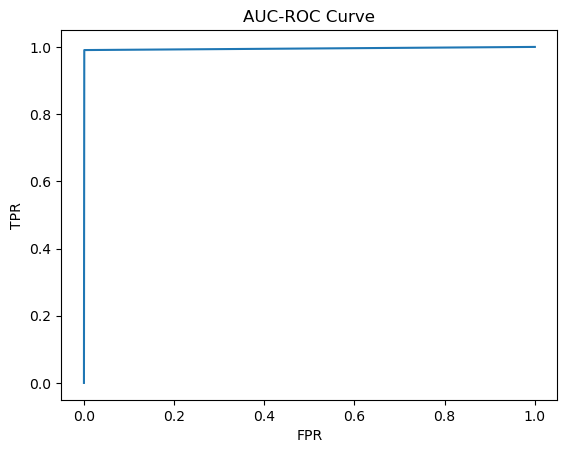

In [125]:
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr6,tpr6)

# XG Boost

In [109]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [110]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
xgb_p=xgb.predict(x_te)

In [112]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[9572,    0],
       [   0,  428]], dtype=int64)

In [113]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

100.0

In [114]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9572
           1       1.00      1.00      1.00       428

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [115]:
#tpr=tp/(tp+fn)
tpr7=9572/(9572+0)
tpr7

1.0

In [116]:
#fpr=fp/(fp+tn)
fpr7= 0/(0+ 428)
fpr7

0.0

In [117]:
#precision=tp/(tp+fp)
precision7=9572/(9572+0)
precision7

1.0

In [118]:
#f1-score=2(precision*recall)/(precision+recall)
f1score7=(2*(precision7*tpr7))/(precision7+tpr7)
f1score7

1.0

In [119]:
#df -1
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc,dt_acc,rf_acc,nb_acc,svc_acc,knn_acc,adbo_acc,xgb_acc]
l3=[fpr,fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
l4=[tpr,tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7]
l5=[f1score,f1score1,f1score3,f1score3,f1score4,f1score5,f1score6,f1score7]

In [120]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,96.68,0.633178,0.993627,0.988669
1,dt,99.89,0.009346,0.999269,0.993783
2,rf,99.48,0.121495,1.000000,0.978132
3,nb,95.72,1.000000,1.000000,0.978132
4,svc,95.72,1.000000,1.000000,0.978132
5,knn,95.74,0.992991,0.999896,0.978230
6,adaboost,99.89,0.009346,0.999269,0.999425
7,xgboost,100.00,0.000000,1.000000,1.000000


# class imbalance

In [126]:
#Random undersampling
c_0,c_1=data["Panic_Disorder_Diagnosis"].value_counts()
c_0,c_1

(47878, 2122)

In [127]:
train_0=data[data["Panic_Disorder_Diagnosis"]==0]
train_1=data[data["Panic_Disorder_Diagnosis"]==1]

In [128]:
train_0.shape,train_1.shape

((47878, 16), (2122, 16))

In [129]:
train_0under=train_0.sample(c_1,replace=True)

In [130]:
train_0under.shape

(2122, 16)

In [131]:
class_1=pd.concat([train_0under,train_1],axis=0)

In [132]:
class_1.shape

(4244, 16)

In [133]:
class_1.Panic_Disorder_Diagnosis.value_counts()

Panic_Disorder_Diagnosis
0    2122
1    2122
Name: count, dtype: int64

# Outlier

<Axes: >

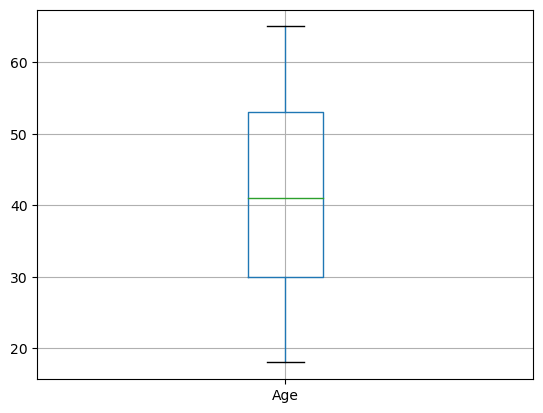

In [134]:
class_1.boxplot(column="Age")

# skewness

In [135]:
class_1.skew()

Age                        -0.008807
Gender                     -0.002829
Family_History             -0.274074
Personal_History           -0.339493
Current_Stressors           0.567941
Symptoms                   -0.236476
Severity                   -0.349027
Impact_on_Life             -0.389893
Demographics                0.164609
Medical_History             0.088535
Psychiatric_History         0.064240
Substance_Use               0.089089
Coping_Mechanisms          -0.142881
Social_Support             -0.024380
Lifestyle_Factors          -1.052516
Panic_Disorder_Diagnosis    0.000000
dtype: float64

# visualization

<Axes: xlabel='Panic_Disorder_Diagnosis', ylabel='count'>

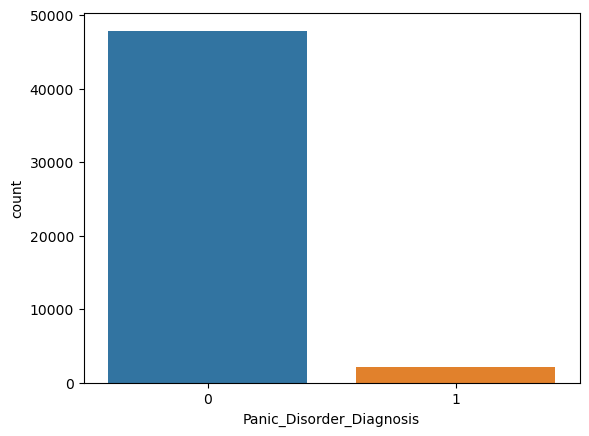

In [159]:
sns.countplot(x="Panic_Disorder_Diagnosis", data=data)

<Axes: xlabel='Panic_Disorder_Diagnosis', ylabel='count'>

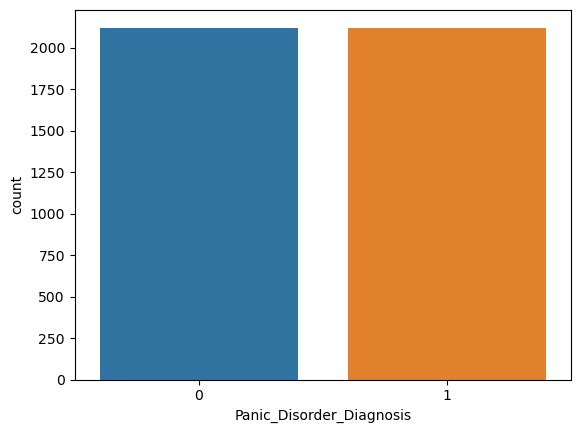

In [161]:
sns.countplot(x="Panic_Disorder_Diagnosis", data=class_1)

<Axes: xlabel='Family_History'>

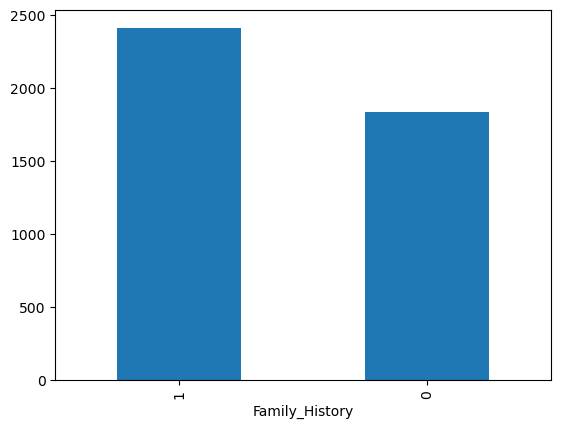

In [163]:
class_1["Family_History"].value_counts().plot.bar()

<Axes: xlabel='Personal_History'>

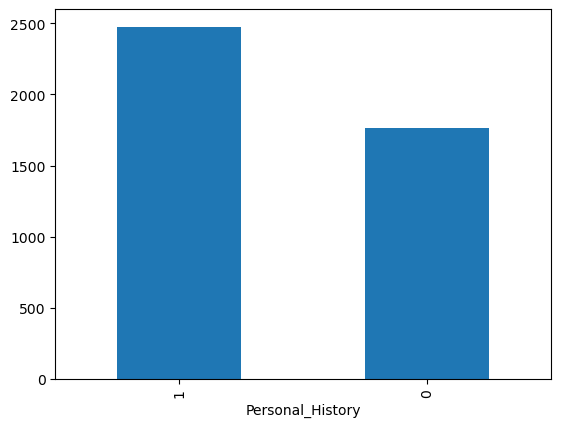

In [165]:
class_1["Personal_History"].value_counts().plot.bar()

<Axes: xlabel='Current_Stressors', ylabel='count'>

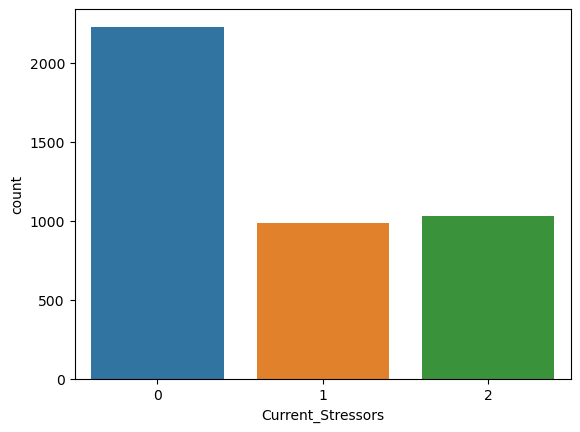

In [167]:
sns.countplot(x="Current_Stressors", data=class_1)

<Axes: xlabel='Substance_Use', ylabel='count'>

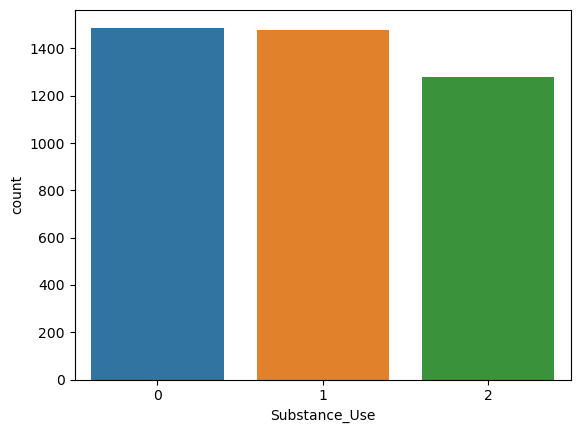

In [169]:
sns.countplot(x="Substance_Use", data=class_1)

In [234]:
cor=class_1.corr()
cor

,Age,Gender,Family_History,Personal_History,Current_Stressors,Symptoms,Severity,Impact_on_Life,Demographics,Medical_History,Psychiatric_History,Substance_Use,Coping_Mechanisms,Social_Support,Lifestyle_Factors,Panic_Disorder_Diagnosis
Age,1.000000,-0.004713,0.008973,0.001285,-0.008658,-0.011399,0.020452,-0.023056,0.012213,0.003294,0.015733,-0.000246,0.011414,0.017882,-0.005250,-0.004670
Gender,-0.004713,1.000000,0.010746,-0.000240,-0.003496,0.007844,0.006481,0.003043,0.028014,0.003185,0.018781,-0.007514,-0.001933,-0.008918,-0.009371,0.006126
Family_History,0.008973,0.010746,1.000000,-0.189692,-0.064500,-0.000364,0.063885,0.038860,-0.011638,-0.014690,-0.014709,-0.032386,0.015146,0.012605,0.098046,0.179797
Personal_History,0.001285,-0.000240,-0.189692,1.000000,-0.046382,0.007275,0.037732,0.059961,-0.028724,-0.009606,0.003738,0.014467,-0.006800,-0.001113,0.113382,0.186894
Current_Stressors,-0.008658,-0.003496,-0.064500,-0.046382,1.000000,0.089881,-0.071807,-0.068396,0.048885,-0.002273,0.027891,0.011665,-0.060396,0.002655,-0.204719,-0.350685
Symptoms,-0.011399,0.007844,-0.000364,0.007275,0.089881,1.000000,0.027360,0.020734,0.002157,-0.038923,-0.013257,0.027774,0.015778,0.003919,0.064510,0.100730
Severity,0.020452,0.006481,0.063885,0.037732,-0.071807,0.027360,1.000000,-0.172109,-0.015049,-0.022331,-0.045599,-0.001530,0.034478,0.009076,0.121574,0.239863
Impact_on_Life,-0.023056,0.003043,0.038860,0.059961,-0.068396,0.020734,-0.172109,1.000000,-0.026096,-0.031022,-0.044289,-0.027733,0.031216,0.023179,0.190828,0.294170
Demographics,0.012213,0.028014,-0.011638,-0.028724,0.048885,0.002157,-0.015049,-0.026096,1.000000,-0.139436,-0.021361,0.002623,-0.022187,-0.003345,-0.034241,-0.073764
Medical_History,0.003294,0.003185,-0.014690,-0.009606,-0.002273,-0.038923,-0.022331,-0.031022,-0.139436,1.000000,0.014252,0.003811,-0.018262,0.019361,-0.051303,-0.100492


<Axes: >

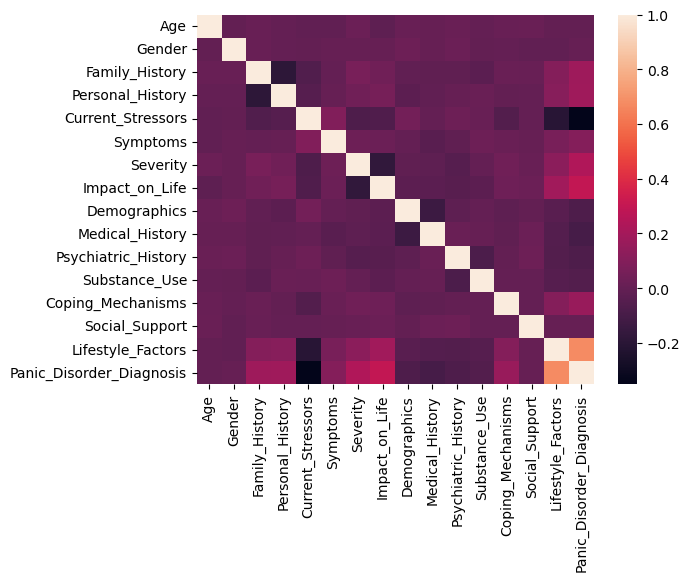

In [235]:
sns.heatmap(cor)

# model building

In [136]:
xo=class_1.iloc[:,:-1]
yo=class_1.iloc[:,-1]

In [137]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(xo,yo,test_size=0.2,random_state=100)

In [138]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((3395, 15), (849, 15), (3395,), (849,))

# LogisticRegression

In [139]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [140]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [141]:
lg_p1=lg.predict(x1_te)
lg_p1

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [142]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[386,  23],
       [ 55, 385]], dtype=int64)

In [143]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

90.81272084805654

In [144]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       409
           1       0.94      0.88      0.91       440

    accuracy                           0.91       849
   macro avg       0.91      0.91      0.91       849
weighted avg       0.91      0.91      0.91       849



In [145]:
#tpr=tp/(tp+fn)
tpr8=386/(386+55)
tpr8

0.8752834467120182

In [146]:
#fpr=fp/(fp+tn)
fpr8= 23/(23+385)
fpr8

0.056372549019607844

In [147]:
#precision=tp/(tp+fp)
precision8=386/(386+23)
precision8

0.9437652811735942

In [148]:
#f1-score=2(precision*recall)/(precision+recall)
f1score8=(2*(precision8*tpr8))/(precision8+tpr8)
f1score8


0.9082352941176471

# DecisionTree

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [150]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [151]:
dt_p1=dt.predict(x1_te)
dt_p1

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [152]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[435,   1],
       [  6, 407]], dtype=int64)

In [153]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

99.17550058892816

In [154]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       1.00      0.99      0.99       413

    accuracy                           0.99       849
   macro avg       0.99      0.99      0.99       849
weighted avg       0.99      0.99      0.99       849



In [155]:
#tpr=tp/(tp+fn)
tpr9=435/(435+6)
tpr9

0.9863945578231292

In [156]:
#fpr=fp/(fp+tn)
fpr9= 1/(1+ 407)
fpr9

0.0024509803921568627

In [157]:
#precision=tp/(tp+fp)
precision9=435/(435+1)
precision9

0.9977064220183486

In [158]:
#f1-score=2(precision*recall)/(precision+recall)
f1score9=(2*(precision9*tpr9))/(precision9+tpr9)
f1score9

0.9920182440136829

In [250]:
fpr9,tpr9,threshold9=roc_curve(y1_te,dt_p1)

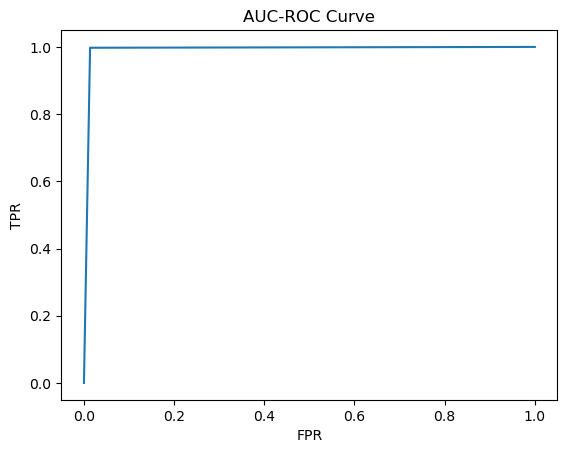

In [251]:
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr9,tpr9)

# RandomForest

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [172]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [173]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [174]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[427,   0],
       [ 14, 408]], dtype=int64)

In [175]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

98.3510011778563

In [176]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       427
           1       1.00      0.97      0.98       422

    accuracy                           0.98       849
   macro avg       0.98      0.98      0.98       849
weighted avg       0.98      0.98      0.98       849



In [177]:
#tpr=tp/(tp+fn)
tpr10=427/(427+14)
tpr10

0.9682539682539683

In [178]:
#fpr=fp/(fp+tn)
fpr10= 0/(0+ 408)
fpr10

0.0

In [179]:
#precision=tp/(tp+fp)
precision10=427/(427+0)
precision10

1.0

In [180]:
#f1-score=2(precision*recall)/(precision+recall)
f1score10=(2*(precision10*tpr10))/(precision10+tpr10)
f1score10

0.9838709677419354

# naive_bayes

In [181]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [182]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [183]:
nb_p1=nb.predict(x1_te)

In [184]:
nb_m1=confusion_matrix(nb_p1,y1_te)
nb_m1

array([[344,  63],
       [ 97, 345]], dtype=int64)

In [185]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

81.15429917550058

In [186]:
print(classification_report(nb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       407
           1       0.85      0.78      0.81       442

    accuracy                           0.81       849
   macro avg       0.81      0.81      0.81       849
weighted avg       0.81      0.81      0.81       849



In [187]:
#tpr=tp/(tp+fn)
tpr11=344/(344+97)
tpr11

0.780045351473923

In [188]:
#fpr=fp/(fp+tn)
fpr11= 63/(63+345)
fpr11

0.15441176470588236

In [189]:
#precision=tp/(tp+fp)
precision11=344/(344+63)
precision11

0.8452088452088452

In [190]:
#f1-score=2(precision*recall)/(precision+recall)
f1score11=(2*(precision11*tpr11))/(precision11+tpr11)
f1score11

0.8113207547169811

# Svm

In [191]:
#svm
from sklearn.svm import SVC
svc=SVC()

In [192]:
svc.fit(x1_tr,y1_tr)

SVC()

In [193]:
svc_p1=svc.predict(x1_te)

In [194]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[334,  10],
       [107, 398]], dtype=int64)

In [195]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

86.21908127208481

In [196]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       344
           1       0.98      0.79      0.87       505

    accuracy                           0.86       849
   macro avg       0.87      0.88      0.86       849
weighted avg       0.89      0.86      0.86       849



In [197]:
#tpr=tp/(tp+fn)
tpr12=334/(334+107)
tpr12

0.7573696145124716

In [198]:
#fpr=fp/(fp+tn)
fpr12= 10/(10+398)
fpr12

0.024509803921568627

In [199]:
#precision=tp/(tp+fp)
precision12=334/(334+10)
precision12

0.9709302325581395

In [200]:
#f1-score=2(precision*recall)/(precision+recall)
f1score12=(2*(precision12*tpr12))/(precision12+tpr12)
f1score12

0.8509554140127388

# knn

In [201]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [202]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=15)

In [203]:
knn_p1=knn.predict(x1_te)

In [204]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[294,   7],
       [147, 401]], dtype=int64)

In [205]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

81.86101295641932

In [206]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79       301
           1       0.98      0.73      0.84       548

    accuracy                           0.82       849
   macro avg       0.82      0.85      0.82       849
weighted avg       0.87      0.82      0.82       849



In [207]:
#tpr=tp/(tp+fn)
tpr13=294/(294+147)
tpr13

0.6666666666666666

In [208]:
#fpr=fp/(fp+tn)
fpr13= 7/(7+ 401)
fpr13

0.01715686274509804

In [209]:
#precision=tp/(tp+fp)
precision13=294/(294+7)
precision13

0.9767441860465116

In [210]:
#f1-score=2(precision*recall)/(precision+recall)
f1score13=(2*(precision13*tpr13))/(precision13+tpr13)
f1score13

0.7924528301886793

# AdaBoost 

In [211]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [212]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [213]:
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [214]:
adbo_p1=adbo.predict(x1_te)

In [215]:
adboo_m1=confusion_matrix(adbo_p1,y1_te)
adboo_m1

array([[435,   1],
       [  6, 407]], dtype=int64)

In [216]:
adbo_acc1=adboo_m1.diagonal().sum()/adboo_m1.sum()*100
adbo_acc1

99.17550058892816

In [217]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       1.00      0.99      0.99       413

    accuracy                           0.99       849
   macro avg       0.99      0.99      0.99       849
weighted avg       0.99      0.99      0.99       849



In [218]:
#tpr=tp/(tp+fn)
tpr14=435/(435+6)
tpr14

0.9863945578231292

In [219]:
#fpr=fp/(fp+tn)
fpr14=1/(1+ 407)
fpr14

0.0024509803921568627

In [220]:
#precision=tp/(tp+fp)
precision14=435/(435+1)
precision14

0.9977064220183486

In [221]:
#f1-score=2(precision*recall)/(precision+recall)
f1score14=(2*(precision14*tpr14))/(precision14+tpr14)
f1score14

0.9920182440136829

# xgboost

In [222]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [223]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [224]:
xgb_p1=xgb.predict(x1_te)

In [225]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[433,   0],
       [  8, 408]], dtype=int64)

In [226]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

99.05771495877504

In [227]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       433
           1       1.00      0.98      0.99       416

    accuracy                           0.99       849
   macro avg       0.99      0.99      0.99       849
weighted avg       0.99      0.99      0.99       849



In [228]:
#tpr=tp/(tp+fn)
tpr15=433/(433+8)
tpr15

0.981859410430839

In [229]:
#fpr=fp/(fp+tn)
fpr15=0/(0+ 408)
fpr15

0.0

In [230]:
#precision=tp/(tp+fp)
precision15=433/(433+0)
precision15

1.0

In [231]:
#f1-score=2(precision*recall)/(precision+recall)
f1score15=(2*(precision15*tpr15))/(precision15+tpr15)
f1score15

0.9908466819221967

In [232]:
#df_2
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc1,dt_acc1,rf_acc1,nb_acc1,svc_acc1,knn_acc1,adbo_acc1,xgb_acc1]
l3=[fpr8,fpr9,fpr10,fpr11,fpr12,fpr13,fpr14,fpr15]
l4=[tpr8,tpr9,tpr10,tpr11,tpr12,tpr13,tpr14,tpr15]
l5=[f1score8,f1score9,f1score10,f1score11,f1score12,f1score13,f1score14,f1score15]

In [233]:
final1=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final1

,Model_Name,accuracy,fpr,tpr,f1score
0,log,90.812721,0.056373,0.875283,0.908235
1,dt,99.175501,0.002451,0.986395,0.992018
2,rf,98.351001,0.000000,0.968254,0.983871
3,nb,81.154299,0.154412,0.780045,0.811321
4,svc,86.219081,0.024510,0.757370,0.850955
5,knn,81.861013,0.017157,0.666667,0.792453
6,adaboost,99.175501,0.002451,0.986395,0.992018
7,xgboost,99.057715,0.000000,0.981859,0.990847


# feature selection

In [236]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [237]:
rfe=RFE(dTree)

In [238]:
rfe.fit(class_1.iloc[:,:-1],class_1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [239]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True])

In [240]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(class_1.iloc[:,:-1].columns)})
rfe_df

,Importances,Columns
0,False,Age
1,False,Gender
2,False,Family_History
3,False,Personal_History
4,True,Current_Stressors
5,True,Symptoms
6,True,Severity
7,True,Impact_on_Life
8,False,Demographics
9,False,Medical_History


In [241]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
4,True,Current_Stressors
5,True,Symptoms
6,True,Severity
7,True,Impact_on_Life
12,True,Coping_Mechanisms
13,True,Social_Support
14,True,Lifestyle_Factors
0,False,Age
1,False,Gender
2,False,Family_History


In [242]:
d1=class_1.drop(["Gender","Age","Demographics","Medical_History","Psychiatric_History","Substance_Use","Family_History","Personal_History"],axis=1)

In [243]:
d1.head(1)

,Current_Stressors,Symptoms,Severity,Impact_on_Life,Coping_Mechanisms,Social_Support,Lifestyle_Factors,Panic_Disorder_Diagnosis
34395,1,2,1,0,2,2,0,0


In [244]:
d1.shape

(4244, 8)

In [245]:
x2=d1.iloc[:,:-1]
y2=d1.iloc[:,-1]

In [246]:
x2.head(1)

,Current_Stressors,Symptoms,Severity,Impact_on_Life,Coping_Mechanisms,Social_Support,Lifestyle_Factors
34395,1,2,1,0,2,2,0


In [247]:
from sklearn.model_selection import train_test_split

In [248]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [249]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((3395, 7), (849, 7), (3395,), (849,))

# LogisticRegression

In [252]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [254]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [255]:
lg_p3=lg.predict(x2_te)
lg_p3

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

In [256]:
lg_m3=confusion_matrix(lg_p3,y2_te)
lg_m3

array([[366,  23],
       [ 75, 385]], dtype=int64)

In [257]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

88.4570082449941

In [258]:
print(classification_report(lg_p3,y2_te))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       389
           1       0.94      0.84      0.89       460

    accuracy                           0.88       849
   macro avg       0.89      0.89      0.88       849
weighted avg       0.89      0.88      0.88       849



In [259]:
#tpr=tp/(tp+fn)
tpr16=366/(366+75)
tpr16

0.8299319727891157

In [260]:
#fpr=fp/(fp+tn)
fpr16=23/(23+385)
fpr16

0.056372549019607844

In [261]:
#precision=tp/(tp+fp)
precision16=366/(366+23)
precision16

0.9408740359897172

In [262]:
#f1-score=2(precision*recall)/(precision+recall)
f1score16=(2*(precision16*tpr16))/(precision16+tpr16)
f1score16

0.8819277108433735

# DecisionTree

In [263]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [264]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [265]:
dt_p3=dt.predict(x2_te)
dt_p3

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [266]:
dt_m3=confusion_matrix(dt_p3,y2_te)
dt_m3

array([[425,   0],
       [ 16, 408]], dtype=int64)

In [267]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

98.11542991755006

In [268]:
print(classification_report(dt_p3,y2_te))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       425
           1       1.00      0.96      0.98       424

    accuracy                           0.98       849
   macro avg       0.98      0.98      0.98       849
weighted avg       0.98      0.98      0.98       849



In [269]:
#tpr=tp/(tp+fn)
tpr17=425/(425+16)
tpr17

0.963718820861678

In [270]:
#fpr=fp/(fp+tn)
fpr17=0/(0+408)
fpr17

0.0

In [271]:
#precision=tp/(tp+fp)
precision17=425/(425+0)
precision17

1.0

In [272]:
#f1-score=2(precision*recall)/(precision+recall)
f1score17=(2*(precision17*tpr17))/(precision17+tpr17)
f1score17

0.9815242494226328

# RandomForest

In [273]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [274]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [275]:
rf_pre3=rf.predict(x2_te)
rf_pre3

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [276]:
rf_mat3=confusion_matrix(rf_pre3,y2_te)
rf_mat3

array([[422,   0],
       [ 19, 408]], dtype=int64)

In [277]:
rf_acc3=rf_mat3.diagonal().sum()/rf_mat3.sum()*100
rf_acc3

97.7620730270907

In [278]:
print(classification_report (rf_pre3,y2_te))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       422
           1       1.00      0.96      0.98       427

    accuracy                           0.98       849
   macro avg       0.98      0.98      0.98       849
weighted avg       0.98      0.98      0.98       849



In [279]:
#tpr=tp/(tp+fn)
tpr18=422/(422+19)
tpr18

0.9569160997732427

In [280]:
#fpr=fp/(fp+tn)
fpr18= 0/(0+408)
fpr18

0.0

In [281]:
#precision=tp/(tp+fp)
precision18=422/(422+0)
precision18

1.0

In [282]:
#f1-score=2(precision*recall)/(precision+recall)
f1score18=(2*(precision18*tpr18))/(precision18+tpr18)
f1score18

0.9779837775202781

# naive_bayes

In [283]:
#nb
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [284]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [285]:
nb_p3=nb.predict(x2_te)

In [286]:
nb_m3=confusion_matrix(nb_p3,y2_te)
nb_m3

array([[300, 102],
       [141, 306]], dtype=int64)

In [287]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

71.37809187279152

In [288]:
print(classification_report(nb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       402
           1       0.75      0.68      0.72       447

    accuracy                           0.71       849
   macro avg       0.72      0.72      0.71       849
weighted avg       0.72      0.71      0.71       849



In [289]:
#tpr=tp/(tp+fn)
tpr19=300/(300+141)
tpr19

0.6802721088435374

In [290]:
#fpr=fp/(fp+tn)
fpr19=102/(102+306)
fpr19

0.25

In [291]:
#precision=tp/(tp+fp)
precision19=300/(300+102)
precision19

0.746268656716418

In [292]:
#f1-score=2(precision*recall)/(precision+recall)
f1score19=(2*(precision19*tpr19))/(precision19+tpr19)
f1score19

0.7117437722419929

# svm

In [293]:
from sklearn.svm import SVC
svc=SVC()

In [294]:
svc.fit(x2_tr,y2_tr)

SVC()

In [295]:
svc_p3=svc.predict(x2_te)

In [296]:
svc_m3=confusion_matrix(svc_p3,y2_te)
svc_m3

array([[402,   0],
       [ 39, 408]], dtype=int64)

In [297]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

95.40636042402826

In [298]:
print(classification_report(svc_p3,y2_te))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       402
           1       1.00      0.91      0.95       447

    accuracy                           0.95       849
   macro avg       0.96      0.96      0.95       849
weighted avg       0.96      0.95      0.95       849



In [299]:
#tpr=tp/(tp+fn)
tpr20=402/(402+39)
tpr20

0.9115646258503401

In [300]:
#fpr=fp/(fp+tn)
fpr20=0/(0+408)
fpr20

0.0

In [301]:
#precision=tp/(tp+fp)
precision20=402/(402+0)
precision20

1.0

In [302]:
#f1-score=2(precision*recall)/(precision+recall)
f1score20=(2*(precision20*tpr20))/(precision20+tpr20)
f1score20

0.9537366548042704

# knn

In [303]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [304]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier(n_neighbors=15)

In [305]:
knn_p3=knn.predict(x2_te)

In [306]:
knn_m3=confusion_matrix(knn_p3,y2_te)
knn_m3

array([[350,   1],
       [ 91, 407]], dtype=int64)

In [307]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

89.16372202591283

In [308]:
print(classification_report(knn_p3,y2_te))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       351
           1       1.00      0.82      0.90       498

    accuracy                           0.89       849
   macro avg       0.90      0.91      0.89       849
weighted avg       0.91      0.89      0.89       849



In [309]:
#tpr=tp/(tp+fn)
tpr21=350/(350+91)
tpr21

0.7936507936507936

In [310]:
#fpr=fp/(fp+tn)
fpr21= 1/(1+407)
fpr21

0.0024509803921568627

In [311]:
#precision=tp/(tp+fp)
precision21=350/(350+1)
precision21

0.9971509971509972

In [312]:
#f1-score=2(precision*recall)/(precision+recall)
f1score21=(2*(precision21*tpr21))/(precision21+tpr21)
f1score21

0.8838383838383839

# adaboost

In [313]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [314]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [315]:
adbo.fit(x2_tr,y2_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [316]:
adbo_p3=adbo.predict(x2_te)

In [317]:
adboo_m3=confusion_matrix(adbo_p3,y2_te)
adboo_m3

array([[425,   0],
       [ 16, 408]], dtype=int64)

In [318]:
adbo_acc3=adboo_m3.diagonal().sum()/adboo_m3.sum()*100
adbo_acc3

98.11542991755006

In [319]:
print(classification_report(adbo_p3,y2_te))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       425
           1       1.00      0.96      0.98       424

    accuracy                           0.98       849
   macro avg       0.98      0.98      0.98       849
weighted avg       0.98      0.98      0.98       849



In [320]:
#tpr=tp/(tp+fn)
tpr22=425/(425+16)
tpr22

0.963718820861678

In [321]:
#fpr=fp/(fp+tn)
fpr22=0/(0+408)
fpr22

0.0

In [322]:
#precision=tp/(tp+fp)
precision22=425/(425+0)
precision22

1.0

In [323]:
#f1-score=2(precision*recall)/(precision+recall)
f1score22=(2*(precision22*tpr22))/(precision22+tpr22)
f1score22

0.9815242494226328

# xgboost

In [324]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [325]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [326]:
xgb_p3=xgb.predict(x2_te)

In [327]:
xgb_m3=confusion_matrix(xgb_p3,y2_te)
xgb_m3

array([[425,   0],
       [ 16, 408]], dtype=int64)

In [328]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

98.11542991755006

In [329]:
print(classification_report(xgb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       425
           1       1.00      0.96      0.98       424

    accuracy                           0.98       849
   macro avg       0.98      0.98      0.98       849
weighted avg       0.98      0.98      0.98       849



In [330]:
#tpr=tp/(tp+fn)
tpr23=425/(425+16)
tpr23

0.963718820861678

In [331]:
#fpr=fp/(fp+tn)
fpr23=0/(0+408)
fpr23

0.0

In [332]:
#precision=tp/(tp+fp)
precision23=425/(425+0)
precision23

1.0

In [333]:
#f1-score=2(precision*recall)/(precision+recall)
f1score23=(2*(precision23*tpr23))/(precision23+tpr23)
f1score23

0.9815242494226328

In [334]:
#df-3
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc3,dt_acc3,rf_acc3,nb_acc3,svc_acc3,knn_acc3,adbo_acc3,xgb_acc3]
l3=[fpr16,fpr17,fpr18,fpr19,fpr20,fpr21,fpr22,fpr23]
l4=[tpr16,tpr17,tpr18,tpr19,tpr20,tpr21,tpr22,tpr23]
l5=[f1score16,f1score17,f1score18,f1score19,f1score20,f1score21,f1score22,f1score23]

In [335]:
final2=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final2

,Model_Name,accuracy,fpr,tpr,f1score
0,log,88.457008,0.056373,0.829932,0.881928
1,dt,98.115430,0.000000,0.963719,0.981524
2,rf,97.762073,0.000000,0.956916,0.977984
3,nb,71.378092,0.250000,0.680272,0.711744
4,svc,95.406360,0.000000,0.911565,0.953737
5,knn,89.163722,0.002451,0.793651,0.883838
6,adaboost,98.115430,0.000000,0.963719,0.981524
7,xgboost,98.115430,0.000000,0.963719,0.981524
